In [32]:
import pandas as pd
import matplotlib
from matplotlib import pylab as plt
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np

# Dataset: https://www.kaggle.com/datasets/datasnaek/chess

In [61]:
df = pd.read_csv('games.csv')
print(df.columns)
print(df.shape)
def get_first_char(s):
    return s[0]

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')
(20058, 16)


In [62]:
def split_plus_first(s):
    return s.split('+')[0]
def split_plus_second(s):
    return s.split('+')[1]
def get_first_char(s):
    return s[0]
df['eco_letter'] = list(map(get_first_char,df['opening_eco']))
arr_mins = list(map(split_plus_first, df['increment_code']))
df['time_mins'] = list(map(int,arr_mins))
arr_inc = list(map(split_plus_second, df['increment_code']))
df['time_inc'] = list(map(int,arr_inc))
df['rating_diff'] = df['white_rating'] - df['black_rating']
df = df.drop(columns = ['id','white_id', 'victory_status', 'black_id', 'moves', 'created_at', 'last_move_at', 'increment_code', 
                       'opening_name', 'opening_ply', 'opening_eco'])
df.head()

,rated,turns,winner,white_rating,black_rating,eco_letter,time_mins,time_inc,rating_diff
0,False,13,white,1500,1191,D,15,2,309
1,True,16,black,1322,1261,B,5,10,61
2,True,61,white,1496,1500,C,5,10,-4
3,True,61,white,1439,1454,D,20,0,-15
4,True,95,white,1523,1469,C,30,3,54


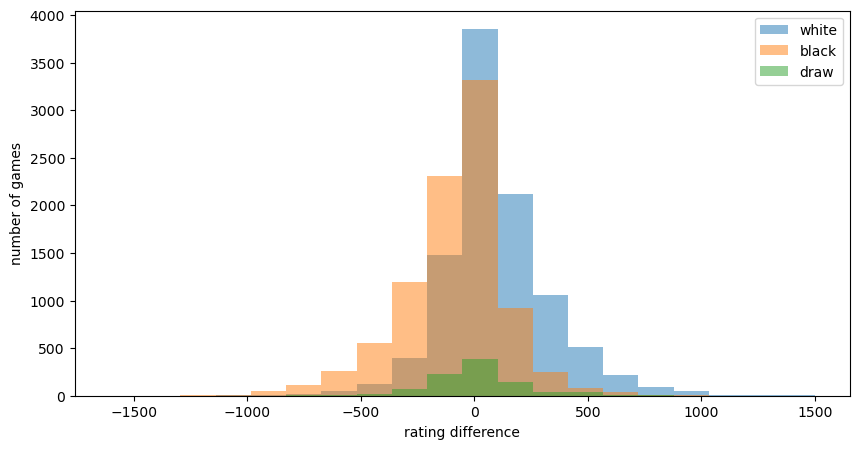

In [69]:
categories = df['winner'].unique()
bin_range = (df['rating_diff'].min(),df['rating_diff'].max())

plt.figure(figsize=(10,5))

for c in categories:
    plt.hist(df[df['winner']==c]['rating_diff'],alpha=0.5,label=c,range=bin_range,bins=20)
plt.legend()
plt.ylabel('number of games')
plt.xlabel('rating difference')
plt.show()

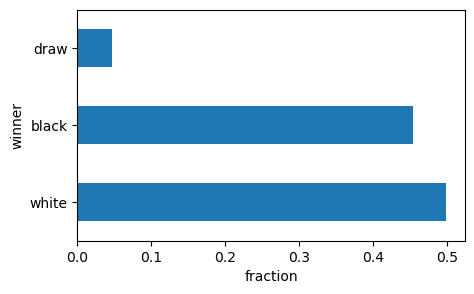

In [51]:
plt.figure(figsize=(5,3))
df['winner'].value_counts(normalize=True).plot.barh()
plt.xlabel('fraction')
plt.show()

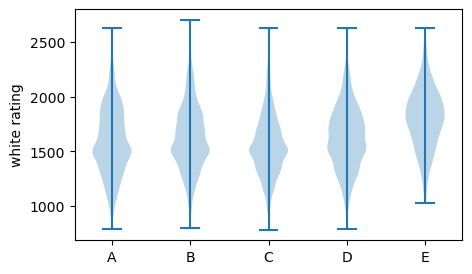

In [68]:
dataset = [df[df['eco_letter']=='A']['white_rating'].values,
           df[df['eco_letter']=='B']['white_rating'].values,
           df[df['eco_letter']=='C']['white_rating'].values,
           df[df['eco_letter']=='D']['white_rating'].values,
           df[df['eco_letter']=='E']['white_rating'].values,]

plt.figure(figsize=(5,3))

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5],['A','B', 'C', 'D', 'E'])
plt.ylabel('white rating')
plt.show()

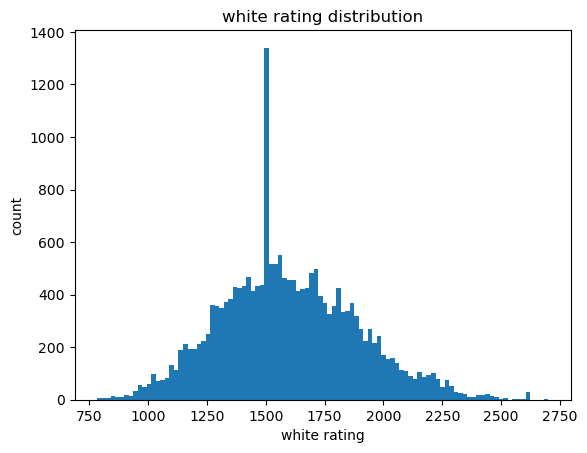

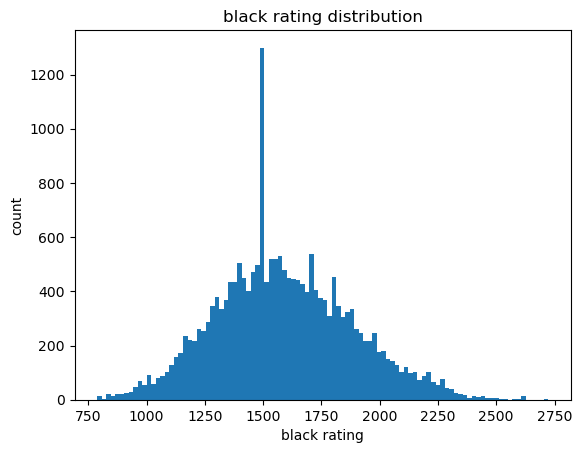

In [12]:
df['white_rating'].plot.hist(bins = 100)
plt.xlabel('white rating')
plt.ylabel('count')
plt.title('white rating distribution')
plt.show()

df['black_rating'].plot.hist(bins = 100)
plt.xlabel('black rating')
plt.ylabel('count')
plt.title('black rating distribution')
plt.show()

In [75]:
for col in df.columns:
    print('column name: ', col, '\n', df[col].describe())

column name:  rated 
 count     20058
unique        2
top        True
freq      16155
Name: rated, dtype: object
column name:  turns 
 count    20058.000000
mean        60.465999
std         33.570585
min          1.000000
25%         37.000000
50%         55.000000
75%         79.000000
max        349.000000
Name: turns, dtype: float64
column name:  winner 
 count     20058
unique        3
top       white
freq      10001
Name: winner, dtype: object
column name:  white_rating 
 count    20058.000000
mean      1596.631868
std        291.253376
min        784.000000
25%       1398.000000
50%       1567.000000
75%       1793.000000
max       2700.000000
Name: white_rating, dtype: float64
column name:  black_rating 
 count    20058.000000
mean      1588.831987
std        291.036126
min        789.000000
25%       1391.000000
50%       1562.000000
75%       1784.000000
max       2723.000000
Name: black_rating, dtype: float64
column name:  eco_letter 
 count     20058
unique        5
top    

In [65]:
# prepare the feature matrix X
X = df.drop(columns = ['winner'])
# prepare the target variable y
y = df['winner']

random_state = 20
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=random_state)

In [66]:
from sklearn.preprocessing import MinMaxScaler
minmax_ftrs = ['white_rating', 'black_rating', 'turns', 'time_mins', 'time_inc', 'rating_diff']
categorical_ftrs = ['rated', 'eco_letter']

scalerMM = MinMaxScaler()
scalerMM.fit(X_train[minmax_ftrs])
print(scalerMM.transform(X_train[minmax_ftrs]))

[[0.33151878 0.3179938  0.36046512 0.05555556 0.         0.51353093]
 [0.29341317 0.29782834 0.14341085 0.05555556 0.         0.50354381]
 [0.39412085 0.41209928 0.43410853 0.08333333 0.         0.49194588]
 ...
 [0.38976592 0.36763185 0.25193798 0.05555556 0.         0.51707474]
 [0.59608057 0.41468459 0.24806202 0.16666667 0.11111111 0.60985825]
 [0.11921611 0.23629783 0.07364341 0.08333333 0.         0.43878866]]


In [67]:
from sklearn.preprocessing import OneHotEncoder

OHenc = OneHotEncoder(sparse_output=False)
OHenc.fit(X_train[categorical_ftrs])
print('categories:',OHenc.categories_)
print('feature names:',OHenc.get_feature_names_out(categorical_ftrs))

categories: [array([False,  True]), array(['A', 'B', 'C', 'D', 'E'], dtype=object)]
feature names: ['rated_False' 'rated_True' 'eco_letter_A' 'eco_letter_B' 'eco_letter_C'
 'eco_letter_D' 'eco_letter_E']


In [ ]:
# look at DIFFERENCE between black and white rating
    # Add as a new column
# Split increment code into mins and increment rating
    # allows model to compare eg. 10 is greater than 5 vs a categorical splitting
# Do stratified split to make sure there are draws in each data set
# Have a visual on the method of splitting that you use (kfold, stratified)
# For EDA, make sure to have 3 DIFFERENT types of plots
# Can use a plot that is target variable vs some other variable
    # Plot winner as a function of difference between ratings 

In [55]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))

new fold
(array(['black', 'draw', 'white'], dtype=object), array([2915,  304, 3200]))
(array(['black', 'draw', 'white'], dtype=object), array([728,  76, 801]))
new fold
(array(['black', 'draw', 'white'], dtype=object), array([2914,  304, 3201]))
(array(['black', 'draw', 'white'], dtype=object), array([729,  76, 800]))
new fold
(array(['black', 'draw', 'white'], dtype=object), array([2914,  304, 3201]))
(array(['black', 'draw', 'white'], dtype=object), array([729,  76, 800]))
new fold
(array(['black', 'draw', 'white'], dtype=object), array([2914,  304, 3201]))
(array(['black', 'draw', 'white'], dtype=object), array([729,  76, 800]))
new fold
(array(['black', 'draw', 'white'], dtype=object), array([2915,  304, 3201]))
(array(['black', 'draw', 'white'], dtype=object), array([728,  76, 800]))
